In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


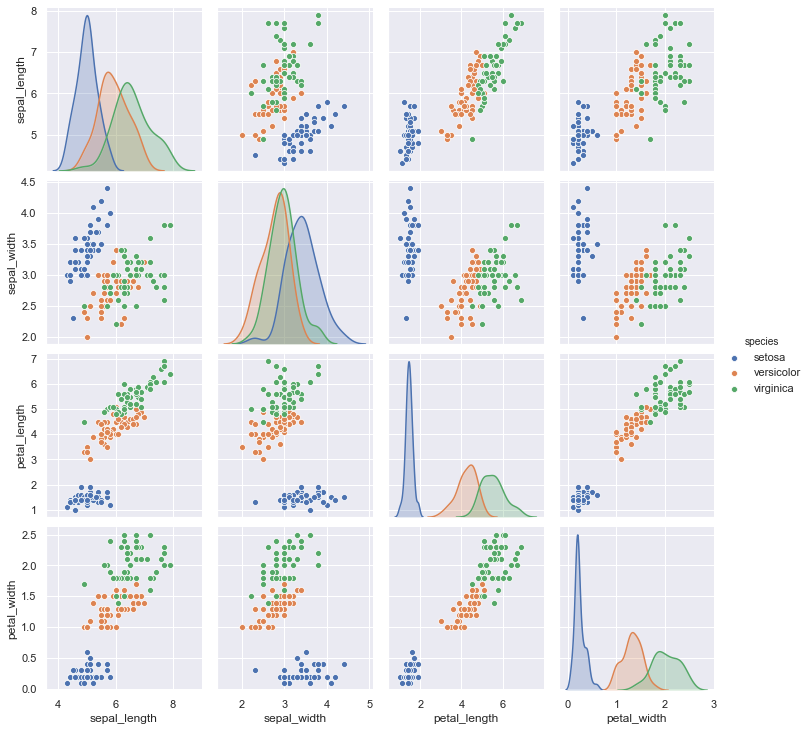

In [35]:
sns.set()
sns.pairplot(iris, hue="species");
plt.show()

# Question 1

Les deux variables explicatives qui semblent le mieux séparer les espèces sont `sepal_with` et `petal_length`

In [36]:
X = iris.values[:,1:3]
y = iris.values[:,4]

In [37]:
X_train = X[:90]
y_train = y[:90]
X_test = X[90:]
y_test = y[90:]

# Question 2

Les données `X` et `y` n'étaient pas mélangées: les espèces sont regroupées. En particulier, l'échantillon de test ne contient quasiment que des espèces virginica, alors que l'échantillon d'apprentissage ne contient aucune espèce virginica. Cela fausserait donc et l'apprentissage et le test. Il faut donc au préalable mélanger le jeu de données.

In [41]:
from sklearn.utils import shuffle
X, y = shuffle(X,y)

X_train = X[:90]
y_train = y[:90]
X_test = X[90:]
y_test = y[90:]

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.9666666666666667
0.95


# Question 3

Le score empirique mesure la proportion de bonnes prédictions, alors que le risque empirique mesure la proportion de mauvaises prédictions (lorsqu la fonction de perte considérée est la perte 0-1). Donc: score = 1 - risque empirique

# Question 4

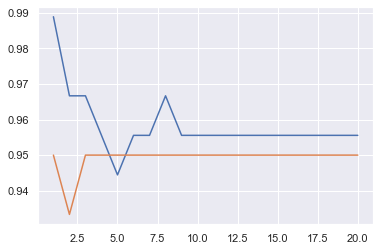

In [43]:
knn = {}
score_train = []
score_test = []

k_range = range(1,21)

for k in k_range:
   knn[k] =  KNeighborsClassifier(n_neighbors=k)
   knn[k].fit(X_train,y_train)
   score_train.append(knn[k].score(X_train,y_train))
   score_test.append(knn[k].score(X_test,y_test))

plt.plot(list(k_range),score_train)
plt.plot(list(k_range),score_test)
plt.show()

La valeur $k=5$ semble ici donner le meilleur score de test. 

In [44]:
def best_knn_score(X,y):
    k_range=range(1,21)
    score_test = []
    X, y = shuffle(X,y)
    X_train = X[:90]
    y_train = y[:90]
    X_test = X[90:]
    y_test = y[90:]
    for k in k_range:
       knn =  KNeighborsClassifier(n_neighbors=k)
       knn.fit(X_train,y_train)
       score_test.append(knn.score(X_test,y_test))
    return max(score_test)

print(best_knn_score(X,y))
print(best_knn_score(X,y))
print(best_knn_score(X,y))

0.9833333333333333
0.95
0.9333333333333333


Le résultat est différent à chaque fois. Cela est dû à au mélange aléatoire des données par `shuffle(X,y)`.

# Question 6

In [45]:
def best_knn_score_avg(X,y):
    scores = []
    for i in range(100):
        scores.append(best_knn_score(X,y))
    return np.mean(scores)

print(best_knn_score_avg(X,y))

0.9581666666666666


# Question 7

In [46]:
X_ = X.copy()
X_[:,0] = X_[:,0]/100

print(best_knn_score_avg(X_,y))

0.9606666666666668


Le score reste similaire 

In [47]:
X_ = X.copy()
X_[:,1] = X_[:,1]/100

print(best_knn_score_avg(X_,y))

0.832333333333333


Le score est cette fois-ci détérioré.

# Question 8

In [48]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

print(best_knn_score_avg(X_scaled,y))

0.9436666666666668


En l'occurence, cela n'améliore pas le score, il est même légèrement détérioré.

In [49]:
X = iris.values[:,0:4]
y = iris.values[:,4]
print(best_knn_score_avg(X,y))

0.9778333333333333


Le score est meilleur.